## 신용대출 심사

- 구체적으로 어떤 비즈니스 성과를 가져다 줄 것인지?

### 1. 환경준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_all.csv'
data = pd.read_csv(path)
data.loc[data['Payment'] == 4, 'Payment'] = 3
data.head()

,Creditability,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuableAsset,Age,Apartment,CreditCount,Occupation,Dependents,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28,2,1,3,1,1,1
1,1,2,9,2,0,276,3,4,4,1,22,1,1,2,1,1,1
2,1,1,18,3,2,1049,2,2,4,2,21,1,1,3,1,1,1
3,1,1,24,3,1,6419,5,2,4,4,44,3,2,4,2,2,1
4,1,3,12,2,2,1424,5,2,4,1,55,2,1,4,1,2,1


In [3]:
data['CreditAmount'].mean()

3271.248

In [4]:
data.shape

(1000, 17)

1    700
0    300
Name: Creditability, dtype: int64
1    0.7
0    0.3
Name: Creditability, dtype: float64


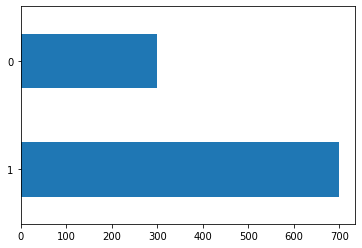

In [5]:
# target
print(data['Creditability'].value_counts())
print(data['Creditability'].value_counts()/ data.shape[0])

data['Creditability'].value_counts().plot(kind = 'barh')
plt.show()

### 2. 데이터 준비

In [6]:
# x, y split
target = 'Creditability'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

In [7]:
# dummy variable
dummy_vars = ['Employment', 'CurrentAddress', 'CreditCount', 'Dependents', 'Telephone', 'AccountBalance', 'Payment', 'Purpose', 'SexMarital', 'MostValuableAsset', 'Apartment','Occupation','ForeignWorker']

x = pd.get_dummies(x, columns = dummy_vars)
x.head()

,Duration,CreditAmount,Age,Employment_1,Employment_2,Employment_3,Employment_4,Employment_5,CurrentAddress_1,CurrentAddress_2,...,MostValuableAsset_4,Apartment_1,Apartment_2,Apartment_3,Occupation_1,Occupation_2,Occupation_3,Occupation_4,ForeignWorker_1,ForeignWorker_2
0,24,1249,28,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,9,276,22,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,18,1049,21,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,24,6419,44,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,1,0
4,12,1424,55,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


In [8]:
# train, valid split
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 2022)

In [10]:
x_train.shape

(800, 54)

### 3. 모델링

In [11]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

In [12]:
model1 = RandomForestClassifier()
model1.fit(x_train, y_train)

RandomForestClassifier()

In [13]:
model2 = XGBClassifier()
model2.fit(x_train, y_train)

XGBClassifier()

In [14]:
model3 = LGBMClassifier()
model3.fit(x_train, y_train)

LGBMClassifier()

In [15]:
pred1 = model1.predict(x_val)
cm1 = confusion_matrix(y_val, pred1)
print(classification_report(y_val, pred1))

              precision    recall  f1-score   support

           0       0.43      0.33      0.37        60
           1       0.74      0.81      0.77       140

    accuracy                           0.67       200
   macro avg       0.58      0.57      0.57       200
weighted avg       0.64      0.67      0.65       200



In [16]:
pred2 = model2.predict(x_val)
cm2 = confusion_matrix(y_val, pred2)
print(classification_report(y_val, pred2))

              precision    recall  f1-score   support

           0       0.55      0.47      0.50        60
           1       0.79      0.84      0.81       140

    accuracy                           0.73       200
   macro avg       0.67      0.65      0.66       200
weighted avg       0.71      0.72      0.72       200



In [17]:
pred3 = model3.predict(x_val)
cm3 = confusion_matrix(y_val, pred3)
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

           0       0.58      0.50      0.54        60
           1       0.80      0.84      0.82       140

    accuracy                           0.74       200
   macro avg       0.69      0.67      0.68       200
weighted avg       0.73      0.74      0.73       200



### 4. 비즈니스 기대가치 평가

* 1: 제 때 대출이자와 원금을 상환하는 고객으로부터, 평균적으로 대출금의 약 4%(연) 이자 수익이 발생 되었습니다.

* 0: 제 때 상환하지 않는 고객으로 인해, 평균적으로 약 9%의 원금 손실(연)이 발생됩니다. 

* 평균 대출 금액은 약 3200달러, 평균 대출 기간은 2년 입니다.

In [18]:
# 비즈니스 가치 matrix
bv = np.array([[0, -0.18], [-0.08, 0.08]])
bv

array([[ 0.  , -0.18],
       [-0.08,  0.08]])

In [19]:
# 모델의 성적표 (Confusion matrix)
cm1p = cm1 / np.sum(cm1) # 비율로 환산
cm2p = cm2 / np.sum(cm2) # 비율로 환산
cm3p = cm3 / np.sum(cm3) # 비율로 환산

In [20]:
# 기대가치 계산하기
# 2년동안의 수익이 1명당 얼마?
print('Random Forest: ', np.sum(cm1p * bv) * 3200) # 평균 대출 금액
print('XGB: ', np.sum(cm2p * bv) * 3200)
print('LGBM: ', np.sum(cm3p * bv) * 3200)

Random Forest:  -5.119999999999991
XGB:  28.160000000000007
LGBM:  36.480000000000004


### 5. 모델 개선하기

In [21]:
# RandomForest
params = {
    'n_estimators': range(5, 201, 5),
}
rf = RandomForestClassifier()
model_rf = GridSearchCV(rf, params, cv=5)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_val)
cm1 = confusion_matrix(y_val, pred_rf)

In [22]:
model_rf.best_estimator_

RandomForestClassifier(n_estimators=90)

In [23]:
# XGB
params = {
    'max_depth': range(1, 10, 1),
    'n_estimators': range(50, 150, 50),
    'learning_rate': [0.01, 0.02, 0.03]
}
xgb = XGBClassifier()
model_xgb = GridSearchCV(xgb, params, cv=5)
model_xgb.fit(x_train, y_train)
pred_xgb = model_xgb.predict(x_val)
cm2 = confusion_matrix(y_val, pred_xgb)

In [24]:
model_xgb.best_estimator_

XGBClassifier(learning_rate=0.03, max_depth=4)

In [25]:
# LGBM
params = {
    'max_depth': range(1, 20),
    'num_leaves': range(10, 30, 1)
}
lgbm = LGBMClassifier()
model_lgbm = GridSearchCV(lgbm, params, cv=5)
model_lgbm.fit(x_train, y_train)
pred_lgbm = model_lgbm.predict(x_val)
cm3 = confusion_matrix(y_val, pred_lgbm)

In [26]:
model_lgbm.best_estimator_

LGBMClassifier(max_depth=6, num_leaves=17)

In [27]:
cm1p = cm1 / np.sum(cm1)
cm2p = cm2 / np.sum(cm2)
cm3p = cm3 / np.sum(cm3)

In [28]:
print('Random Forest: ', np.sum(cm1p * bv) * 3200)
print('XGB: ', np.sum(cm2p * bv) * 3200)
print('LGBM: ', np.sum(cm3p * bv) * 3200)

Random Forest:  19.199999999999996
XGB:  25.92000000000001
LGBM:  39.35999999999999


### 6. 성능 튜닝시 평가지표 교체

In [29]:
def biz_score(y, pred, biz_v):
    cm = confusion_matrix(y, pred)
    cm_p = cm / np.sum(cm)
    amt_mean = 3200

    return np.sum(biz_v * cm_p) * amt_mean

In [30]:
b_score = make_scorer(biz_score, greater_is_better= True, biz_v = bv )

In [31]:
# random하게 찾을 범위를 지정
maxdepth =list(range(3,8))
nestimators = list(range(10,300,10))
param_dist = dict(max_depth= maxdepth, n_estimators = nestimators)

# 모델선언
rf=RandomForestClassifier()
grid_rf = GridSearchCV(rf
                          , param_dist
                          , cv=5                    # k-fold Cross Validation!
                          , scoring=b_score)
# 학습
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290]},
             scoring=make_scorer(biz_score, biz_v=[[ 0.   -0.18]
 [-0.08  0.08]]))

In [32]:
grid_rf.best_params_, grid_rf.best_score_

({'max_depth': 7, 'n_estimators': 60}, 42.4)

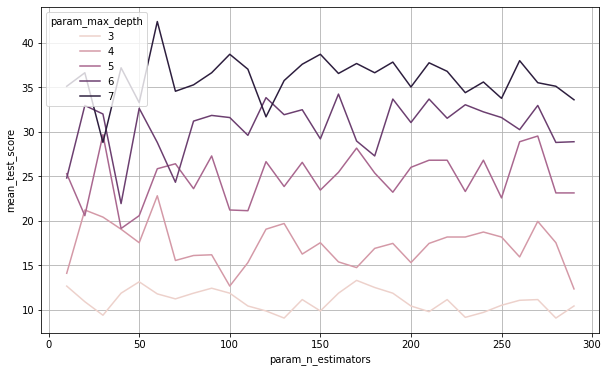

In [33]:
# 튜닝 과정에 대한 그래프
result = pd.DataFrame(grid_rf.cv_results_)
result.loc[:, ['param_max_depth', 'param_n_estimators', 'mean_test_score' ]]

plt.figure(figsize = (10,6))
sns.lineplot(result['param_n_estimators'], result['mean_test_score'], hue = result['param_max_depth'])

plt.grid()
plt.show()